In [11]:
# Heart Disease Prediction
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
from tensorflow.keras import models
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns


print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))


Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.1.3
Numpy: 1.19.3
Sklearn: 0.23.2
Matplotlib: 3.3.2
Keras: 2.5.0


In [14]:
# read the csv
HeartDiseaseData = pd.read_csv('heart_2020_cleaned.csv')

In [24]:
# head of data:
print('__________________________________')
print('head of data:\n', HeartDiseaseData.head())  # Result: First five Rows

__________________________________
head of data:
   HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good    

In [27]:
HeartDiseaseData.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [29]:
HeartDiseaseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [30]:
HeartDiseaseData.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [21]:
# print data from row 280 to the end of data
HeartDiseaseData.loc[280:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
280,No,31.64,No,No,No,0.0,0.0,No,Female,55-59,White,No,Yes,Very good,8.0,No,No,No
281,Yes,35.44,Yes,No,No,30.0,0.0,Yes,Female,80 or older,Black,Yes,No,Poor,7.0,Yes,Yes,No
282,No,31.47,Yes,No,No,0.0,3.0,No,Female,80 or older,Black,No,Yes,Good,9.0,No,No,No
283,No,30.67,No,No,No,0.0,0.0,Yes,Female,65-69,White,No,Yes,Good,7.0,No,No,No
284,No,18.83,Yes,Yes,Yes,30.0,0.0,No,Male,70-74,White,No,No,Good,4.0,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [22]:
# remove missing data (indicated with a "?")
data = HeartDiseaseData[~HeartDiseaseData.isin(['?'])]
data.loc[280:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
280,No,31.64,No,No,No,0.0,0.0,No,Female,55-59,White,No,Yes,Very good,8.0,No,No,No
281,Yes,35.44,Yes,No,No,30.0,0.0,Yes,Female,80 or older,Black,Yes,No,Poor,7.0,Yes,Yes,No
282,No,31.47,Yes,No,No,0.0,3.0,No,Female,80 or older,Black,No,Yes,Good,9.0,No,No,No
283,No,30.67,No,No,No,0.0,0.0,Yes,Female,65-69,White,No,Yes,Good,7.0,No,No,No
284,No,18.83,Yes,Yes,Yes,30.0,0.0,No,Male,70-74,White,No,No,Good,4.0,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [31]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data
# data.loc[280:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [32]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(319795, 18)
HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object


In [46]:
# Checking if 'HeartDisease' column contains only 'Yes' and 'No' values.
data['HeartDisease'].unique

array(['No', 'Yes'], dtype=object)

In [48]:
def change_to_binary(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return np.NaN

data['HeartDisease'] = data['HeartDisease'].apply(lambda x: change_to_binary(x))

In [49]:
object_columns = [column for column in data.columns if data[column].dtypes == 'object']
object_columns

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

<Figure size 2160x720 with 0 Axes>

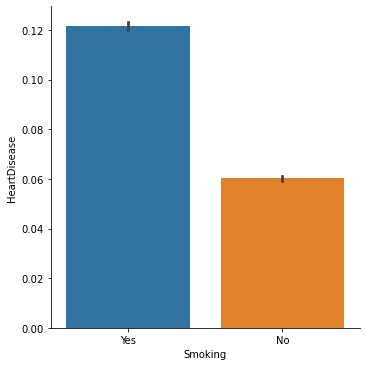

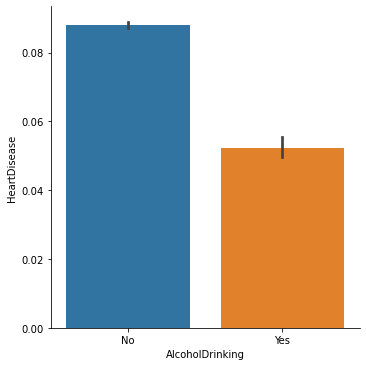

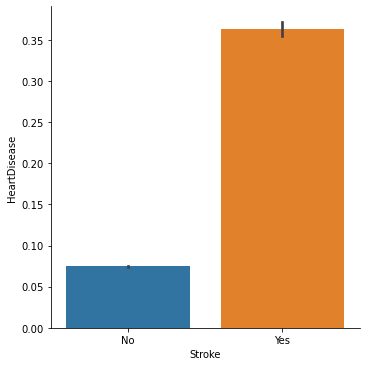

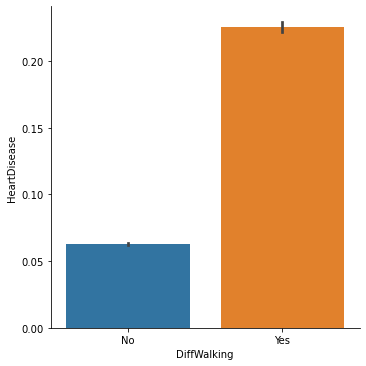

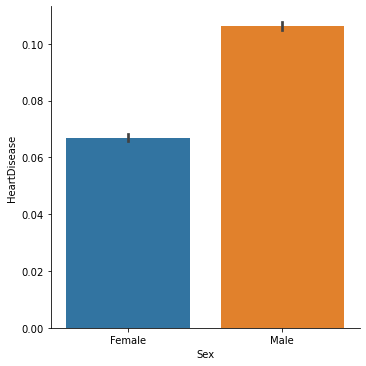

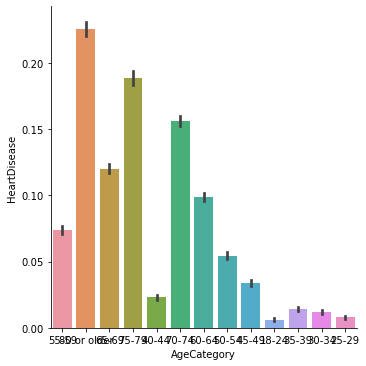

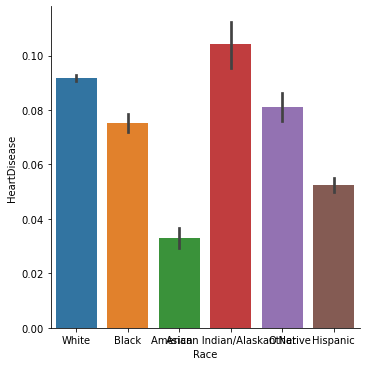

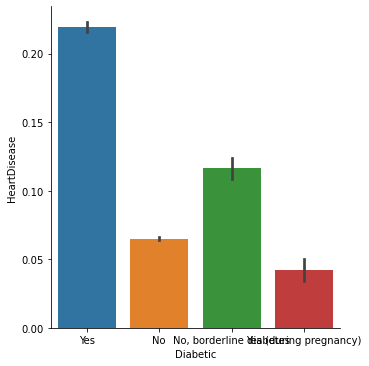

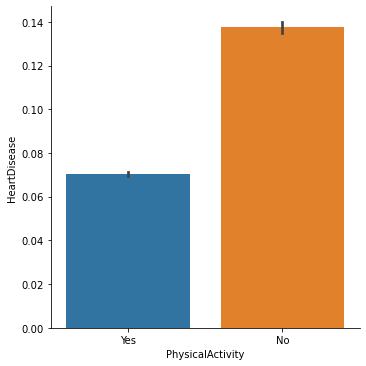

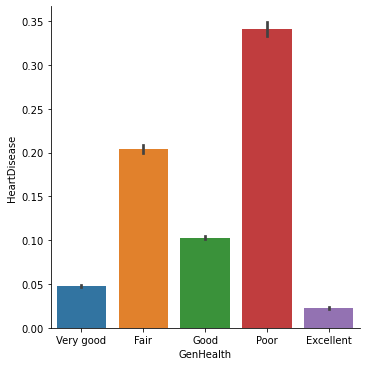

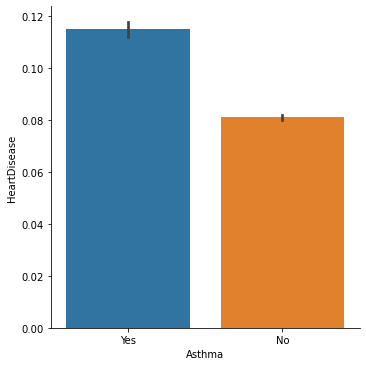

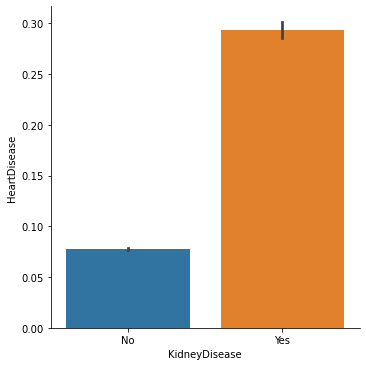

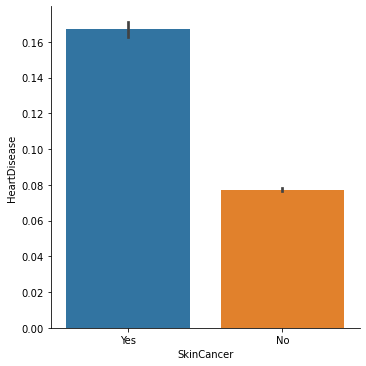

In [50]:
plt.figure(figsize=(30,10))
for column in object_columns:
    sns.catplot(x=column, y='HeartDisease', data=data, kind='bar')

In [51]:
def is_yes_no(x):
    if x == 'Yes' or x == 'No':
        return True
    else:
        return False

columns_to_change = [column for column in data.columns if all(map(lambda x: is_yes_no(x), data[column]))]
columns_to_change

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [52]:
for column in columns_to_change:
    data[column] = data[column].apply(lambda x: change_to_binary(x))

In [54]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.175013,1,0,0,0.100000,1.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,0.214444,0,0,1,0.000000,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,0.280232,1,0,0,0.666667,1.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,0.255245,0,0,0,0.000000,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,0.249974,0,0,0,0.933333,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0


In [56]:
data = pd.get_dummies(data, prefix_sep='_')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0.175013,1,0,0,0.100000,1.0,0,1,5.0,...,1,0,0,1,0,0,0,0,0,1
1,0,0.214444,0,0,1,0.000000,0.0,0,1,7.0,...,1,1,0,0,0,0,0,0,0,1
2,0,0.280232,1,0,0,0.666667,1.0,0,1,8.0,...,1,0,0,1,0,0,1,0,0,0
3,0,0.255245,0,0,0,0.000000,0.0,0,0,6.0,...,1,1,0,0,0,0,0,1,0,0
4,0,0.249974,0,0,0,0.933333,0.0,1,1,8.0,...,1,1,0,0,0,0,0,0,0,1


In [57]:
# Splitting data into features X and labels y.
X = data.drop(['HeartDisease'], axis=1)
y = data['HeartDisease']

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_absolute_error

from sklearn.ensemble     import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [62]:
# Scaling values.
sc = StandardScaler()
X = sc.fit_transform(X)

In [63]:
# Splitting data into training data and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
# Creating random_forest object and fitting the training data.
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
RandomForestRegressor()

RandomForestRegressor()

In [66]:
y_pred_rf = random_forest.predict(X_test)

In [67]:
# Checking score of RandomForestRegressor model with test data by using mean_absolute_error function which will tell us how accurate the predictions are.
mae = mean_absolute_error(y_test, y_pred_rf)
accuracy_rf = (1-mae)*100
print('Accuracy of the RandomForest model is {}%.'.format(round(accuracy_rf, 3)))

Accuracy of the RandomForest model is 86.135%.


In [68]:
# Creating logistic_regression object and fitting the training data.
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)



LogisticRegression()

In [73]:
model = LogisticRegression()

In [74]:
# Checking score of LogisticRegression model with test data by using the same mean_absolute_error function which will tell us how accurate the predictions are.
y_pred_lr = logistic_regression.predict(X_test)

In [81]:
mae = mean_absolute_error(y_test, y_pred_lr)
print(mae)
print(1-mae)
accuracy_lr = (1-mae)*100
print('Accuracy of the LogisticRegression model is {}%.'.format(round(accuracy_lr, 3)))

0.08447599243265216
0.9155240075673479
Accuracy of the LogisticRegression model is 91.552%.


In [75]:
model.fit(X_train, y_train)

LogisticRegression()

In [76]:
model.score(X_test, y_test)

0.9155240075673479